[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_yolov5.ipynb)

## 0. Preperation

- Install latest version of SAHI and ultralytics:

In [1]:
!pip install -U torch sahi ultralytics

In [2]:
import os
os.getcwd()

'/home/mandip/Github/sahi/demo'

- Import required modules:

In [3]:
# arrange an instance segmentation model for test
from sahi.utils.yolov8 import (
    download_yolov8s_model,
)

from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

- Download a yolov8 model and two test images:

In [4]:
# download YOLOV5S6 model to 'models/yolov5s6.pt'
yolov8_model_path = "models/yolov8s.pt"
download_yolov8s_model(yolov8_model_path)

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a YOLOv8 Model

- Instantiate a detection model by defining model weight path and other parameters:

In [5]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path=yolov8_model_path,
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0'
)

04/27/2024 08:13:58 - INFO - matplotlib.font_manager -   Failed to extract font properties from /usr/share/fonts/truetype/noto/NotoColorEmoji.ttf: In FT2Font: Can not load face (unknown file format; error code 0x2)
04/27/2024 08:13:58 - INFO - matplotlib.font_manager -   generated new fontManager


- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [6]:
result = get_prediction("demo_data/M6 377 2A J33.jpeg", detection_model)

/home/mandip/Github/sahi/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [7]:
result = get_prediction(read_image("demo_data/M6 377 2A J33.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

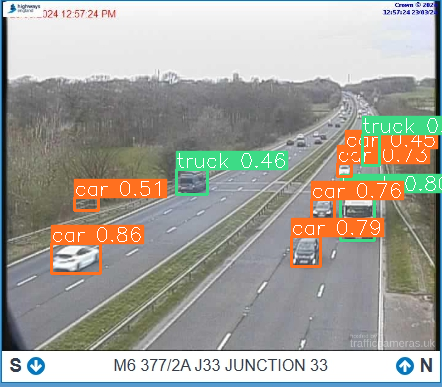

In [8]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a YOLOv8 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [9]:
result = get_sliced_prediction(
    "demo_data/M6 377 2A J33.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 4 number of slices.


- Visualize predicted bounding boxes and masks over the original image:

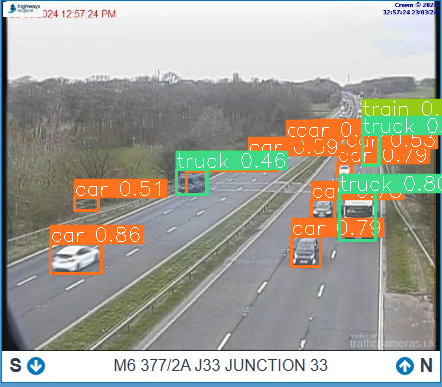

In [10]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [11]:
object_prediction_list = result.object_prediction_list

In [12]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(50.83142852783203, 243.83642578125, 101.18617248535156, 273.3746032714844), w: 50.35474395751953, h: 29.538177490234375>,
    mask: None,
    score: PredictionScore: <value: 0.864909827709198>,
    category: Category: <id: 2, name: car>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [13]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [50.83142852783203,
   243.83642578125,
   50.35474395751953,
   29.538177490234375],
  'score': 0.864909827709198,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1487},
 {'image_id': None,
  'bbox': [337.5700378417969,
   163.01309204101562,
   14.198318481445312,
   13.954898834228516],
  'score': 0.7910552620887756,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 198},
 {'image_id': None,
  'bbox': [291.5031433105469,
   236.0160675048828,
   29.39910888671875,
   30.86865234375],
  'score': 0.7899734973907471,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 907}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [14]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [50.83142852783203,
   243.83642578125,
   50.35474395751953,
   29.538177490234375],
  'score': 0.864909827709198,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1487},
 {'image_id': 1,
  'bbox': [337.5700378417969,
   163.01309204101562,
   14.198318481445312,
   13.954898834228516],
  'score': 0.7910552620887756,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 198},
 {'image_id': 1,
  'bbox': [291.5031433105469,
   236.0160675048828,
   29.39910888671875,
   30.86865234375],
  'score': 0.7899734973907471,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 907}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [15]:
result.to_imantics_annotations()[:3]

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [16]:
result.to_fiftyone_detections()[:3]

ImportError: Please run "pip install -U fiftyone" to install fiftyone first for fiftyone conversion.

## 4. Batch Prediction

- Set model and directory parameters:

In [24]:
model_type = "yolov8"
model_path = yolov8_model_path
model_device = "cpu" # or 'cuda:0'
model_confidence_threshold = 0.4

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [25]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder: demo_data/


Performing inference on images:   0%|          | 0/3 [00:00<?, ?it/s]Ultralytics YOLOv8.0.34 🚀 Python-3.8.15 torch-1.9.0+cu111 CPU


Performing prediction on 20 number of slices.


YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs
Performing inference on images:  33%|███▎      | 1/3 [00:06<00:12,  6.43s/it]

Prediction time is: 6363.72 ms
Performing prediction on 15 number of slices.


Performing inference on images:  67%|██████▋   | 2/3 [00:10<00:05,  5.18s/it]

Prediction time is: 4240.36 ms
Performing prediction on 15 number of slices.


Performing inference on images: 100%|██████████| 3/3 [00:14<00:00,  4.86s/it]

Prediction time is: 3770.72 ms
Prediction results are successfully exported to runs/predict/exp
